In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
from tqdm.notebook import tqdm

In [6]:
def load_pickle(p):
    with open(p,"rb") as f:
        df=pickle.load(f)
    return df

In [7]:
start_distance=27000
end_distance=42000
L=end_distance-start_distance

In [ ]:
# load the observation data
track=load_pickle("../data/03_primary/sec27/track/10m/track_dataset.pkl")

dates=track["date"].unique()
track

In [ ]:
# load the forecasting data of w/ all
run_id=10001

target,pred,_,calc_dates=load_pickle("../data/07_model_output/conv_lstm/regression/{}.pkl".format(run_id))

w_all_df=pd.DataFrame(index=range((len(calc_dates))*(L)),columns=["date","distance","score"])
w_all_df["date"]=np.repeat(calc_dates,L)
w_all_df["date"]=pd.to_datetime(w_all_df["date"])
w_all_df["distance"]=np.repeat(np.arange(start_distance,end_distance).reshape(1,-1),len(calc_dates),axis=0).flatten()
w_all_df["score"]=pred[:,0,:,].flatten()
w_all_df

In [ ]:
# load the forecasting data of w/o maintenance
run_id=10002
target,pred,_,calc_dates=load_pickle("../data/07_model_output/conv_lstm/regression/{}.pkl".format(run_id))

wo_maintenance_df=pd.DataFrame(index=range((len(calc_dates))*(L)),columns=["date","distance","score"])
wo_maintenance_df["date"]=np.repeat(calc_dates,L)
wo_maintenance_df["date"]=pd.to_datetime(wo_maintenance_df["date"])
wo_maintenance_df["distance"]=np.repeat(np.arange(start_distance,end_distance).reshape(1,-1),len(calc_dates),axis=0).flatten()
wo_maintenance_df["score"]=pred[:,0,:,].flatten()
wo_maintenance_df

In [ ]:
# load the maintenance data
work_df=load_pickle("../data/04_feature/sec27/10m/work_unrolled.pkl")
work_df["work"]=work_df[["fix_uneven","tamping","marutai","exchange_ballast","exchange_rail_r","exchange_rail_l","disposal_mud","sleeper","others"]].sum(axis=1)
work_df

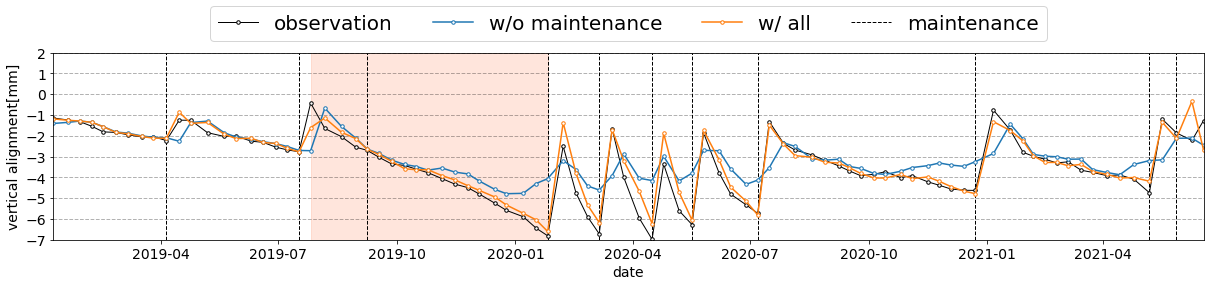

In [15]:
# visualize figure 4a
loc=#<--- the position of point with a normal maintenance frequency --->
test_date="2018/11/07"
input_len=5
line_args={
    "marker":".",
    "markerfacecolor":"white",
    "fillstyle":"full",
    "markersize":7,
}
fontsize=14
y_min=-7
y_max=2

dates=track.loc[track["date"]>test_date,"date"].unique()
dates=dates[input_len:]

fig,ax = plt.subplots(figsize=(17,4))

tmp=work_df.loc[work_df["distance"]==loc,["date","work"]]
tmp=tmp.loc[tmp["work"]>0,"date"].to_numpy()
ax.vlines(tmp,ymin=y_min,ymax=y_max,label="maintenance",color="black",linestyles="dashed",linewidth=1)

buf=track.loc[(track["distance"]==loc)&(track["date"].isin(dates))]
ax.plot(buf["date"],buf["left_surface"],label="observation",linewidth=1,color="black",**line_args)

buf=wo_maintenance_df.loc[(wo_maintenance_df["distance"]==loc)&(wo_maintenance_df["date"].isin(dates))]
ax.plot(buf["date"],buf["score"],label="w/o maintenance",**line_args)

buf=w_all_df.loc[(w_all_df["distance"]==loc)&(w_all_df["date"].isin(dates))]
ax.plot(buf["date"],buf["score"],label="w/ all",**line_args)

ax.set_xlim(dates[0],dates[-1])
ax.set_ylim(y_min,y_max)
ax.grid(which = "major", axis = "y", color = "black", alpha = 0.3, linestyle = "--", linewidth = 1)
ax.axvspan(pd.to_datetime("2019-07-26"),pd.to_datetime("2020-01-26"), color = "coral",alpha=0.2)
ax.legend(ncol=6,bbox_to_anchor=(0,0,1,1.3),loc="upper center",fontsize=20)
ax.tick_params(labelsize=fontsize)
ax.set_yticks(np.arange(-7,3))
ax.set_xlabel("date",fontsize=fontsize)
ax.set_ylabel("vertical alignment[mm]",fontsize=fontsize)
ax.plot()

fig.subplots_adjust(left=0.04, right=0.98, bottom=0.15, top=0.8)

fig.savefig("./ablationstudy_wave1.pdf")

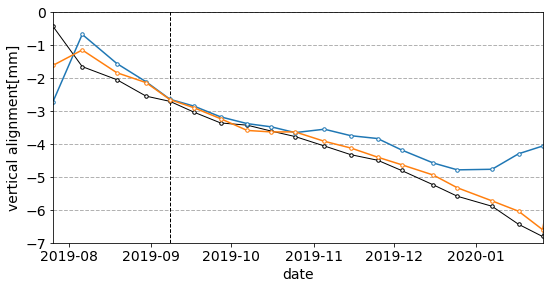

In [16]:
# visualize figure 4c
loc=#<--- the position of point with a normal maintenance frequency --->
test_date="2018/11/07"
input_len=5
line_args={
    "marker":".",
    "markerfacecolor":"white",
    "fillstyle":"full",
    "markersize":7,
}
fontsize=14

dates=track.loc[track["date"]>test_date,"date"].unique()
dates=dates[input_len:]

fig,ax = plt.subplots(figsize=(8,4))

tmp=work_df.loc[work_df["distance"]==loc,["date","work"]]
tmp=tmp.loc[tmp["work"]>0,"date"].to_numpy()
ax.vlines(tmp,ymin=y_min,ymax=y_max,label="maintenance",color="black",linestyles="dashed",linewidth=1)

buf=track.loc[(track["distance"]==loc)&(track["date"].isin(dates))]
ax.plot(buf["date"],buf["left_surface"],label="observation",linewidth=1,color="black",**line_args)

buf=wo_maintenance_df.loc[(wo_maintenance_df["distance"]==loc)&(wo_maintenance_df["date"].isin(dates))]
ax.plot(buf["date"],buf["score"],label="w/o maintenance",**line_args)

buf=w_all_df.loc[(w_all_df["distance"]==loc)&(w_all_df["date"].isin(dates))]
ax.plot(buf["date"],buf["score"],label="w/ all",**line_args)

ax.set_xlim(pd.to_datetime("2019-07-26"),pd.to_datetime("2020-01-26"))
ax.set_ylim(-7,0)
ax.grid(which = "major", axis = "y", color = "black", alpha = 0.3, linestyle = "--", linewidth = 1)
ax.set_xlabel("date",fontsize=fontsize)
ax.set_ylabel("vertical alignment[mm]",fontsize=fontsize)
ax.tick_params(labelsize=fontsize)

ax.plot()

fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15, top=0.95) 
fig.savefig("./ablationstudy_wave2.pdf")

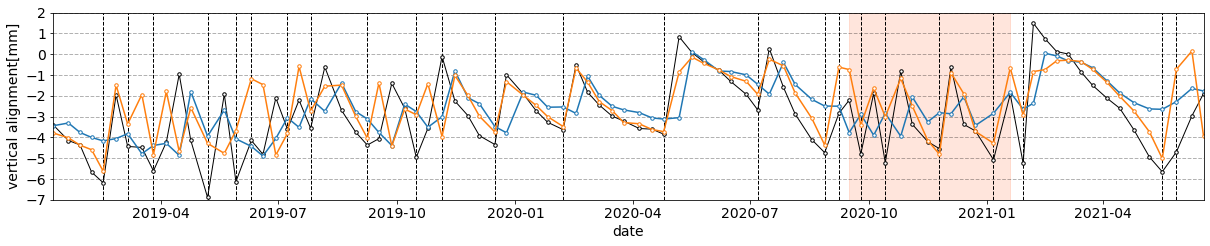

In [17]:
# visualize figure 4b
loc=#<--- the position of point with a high maintenance frequency --->
test_date="2018/11/07"
input_len=5
line_args={
    "marker":".",
    "markerfacecolor":"white",
    "fillstyle":"full",
    "markersize":7,
}
fontsize=14

dates=track.loc[track["date"]>test_date,"date"].unique()
dates=dates[input_len:]

fig,ax = plt.subplots(figsize=(17,4))

tmp=work_df.loc[work_df["distance"]==loc,["date","work"]]
tmp=tmp.loc[tmp["work"]>0,"date"].to_numpy()
ax.vlines(tmp,ymin=y_min,ymax=y_max,label="maintenance",color="black",linestyles="dashed",linewidth=1)

buf=track.loc[(track["distance"]==loc)&(track["date"].isin(dates))]
ax.plot(buf["date"],buf["left_surface"],label="observation",linewidth=1,color="black",**line_args)

buf=wo_maintenance_df.loc[(wo_maintenance_df["distance"]==loc)&(wo_maintenance_df["date"].isin(dates))]
ax.plot(buf["date"],buf["score"],label="w/o maintenance",**line_args)

buf=w_all_df.loc[(w_all_df["distance"]==loc)&(w_all_df["date"].isin(dates))]
ax.plot(buf["date"],buf["score"],label="w/ all",**line_args)

ax.set_xlim(dates[0],dates[-1])
ax.set_ylim(-7,2)
ax.grid(which = "major", axis = "y", color = "black", alpha = 0.3, linestyle = "--", linewidth = 1)
ax.axvspan(pd.to_datetime("2020-09-16"),pd.to_datetime("2021-01-19"), color = "coral",alpha=0.2)
ax.tick_params(labelsize=fontsize)
ax.set_yticks(np.arange(-7,3))
ax.set_xlabel("date",fontsize=fontsize)
ax.set_ylabel("vertical alignment[mm]",fontsize=fontsize)

fig.subplots_adjust(left=0.04, right=0.98, bottom=0.15, top=0.8) 
fig.savefig("./ablationstudy_wave3.pdf")

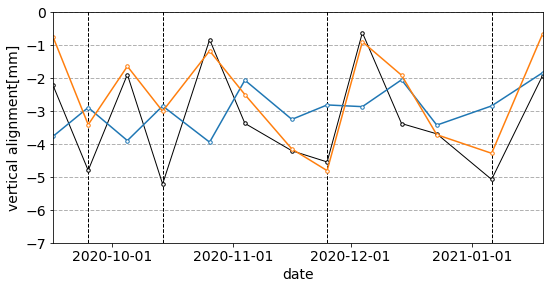

In [18]:
# visualize figure 4d
loc=#<--- the position of point with a high maintenance frequency --->
test_date="2018/11/07"
input_len=5
line_args={
    "marker":".",
    "markerfacecolor":"white",
    "fillstyle":"full",
    "markersize":7,
}
fontsize=14

dates=track.loc[track["date"]>test_date,"date"].unique()
dates=dates[input_len:]

fig,ax = plt.subplots(figsize=(8,4))

tmp=work_df.loc[work_df["distance"]==loc,["date","work"]]
tmp=tmp.loc[tmp["work"]>0,"date"].to_numpy()
ax.vlines(tmp,ymin=y_min,ymax=y_max,label="maintenance",color="black",linestyles="dashed",linewidth=1)

buf=track.loc[(track["distance"]==loc)&(track["date"].isin(dates))]
ax.plot(buf["date"],buf["left_surface"],label="observation",linewidth=1,color="black",**line_args)

buf=wo_maintenance_df.loc[(wo_maintenance_df["distance"]==loc)&(wo_maintenance_df["date"].isin(dates))]
ax.plot(buf["date"],buf["score"],label="w/o maintenance",**line_args)

buf=w_all_df.loc[(w_all_df["distance"]==loc)&(w_all_df["date"].isin(dates))]
ax.plot(buf["date"],buf["score"],label="w/ all",**line_args)

ax.set_xlim(pd.to_datetime("2020-09-16"),pd.to_datetime("2021-01-19"))
ax.set_ylim(-7,0)
ax.grid(which = "major", axis = "y", color = "black", alpha = 0.3, linestyle = "--", linewidth = 1)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel("date",fontsize=fontsize)
ax.set_ylabel("vertical alignment[mm]",fontsize=fontsize)
ax.set_xticks([pd.to_datetime("2020-10"),pd.to_datetime("2020-11"),pd.to_datetime("2020-12"),pd.to_datetime("2021-01")])

fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15, top=0.95) 
fig.savefig("./ablationstudy_wave4.pdf")